In [9]:
import os
import sys

In [16]:
DATASET_TRAIN = os.path.join("..", "extracted_data", "train.csv")
DATASET_TEST = os.path.join("..", "extracted_data", "test.csv")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing dataset

In [18]:
df_train = pd.read_csv(DATASET_TRAIN)
df_test = pd.read_csv(DATASET_TEST)

Describing the dataset

In [19]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [31]:
df_train.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [49]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


### Analysis approved load category

- 0 -> Not approved 
- 1 -> Approved

In [41]:
df_approved_load = df_train[df_train['loan_status'] == 1].drop(['id'], axis=1).reset_index()


In [50]:
df_approved_load.head()

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,11,22,33000,RENT,6.0,PERSONAL,B,10000,11.12,0.30,N,2,1
1,24,22,30000,RENT,3.0,MEDICAL,D,5000,16.49,0.17,N,4,1
2,25,25,25000,RENT,3.0,VENTURE,C,3500,13.49,0.14,Y,3,1
3,38,30,54000,RENT,0.0,MEDICAL,B,12500,11.71,0.24,N,10,1
4,39,22,32000,RENT,6.0,EDUCATION,D,8000,15.58,0.25,N,3,1


Starting with analysing approved loan with factor 'loan intent'.

In [39]:
# df_age_loan_intent = df_approved_load[['person_age', 'loan_intent']]
# df_age_loan_intent

In [44]:
loan_intent = df_approved_load['loan_intent'].value_counts()
loan_intent

loan_intent
MEDICAL              1949
DEBTCONSOLIDATION    1729
PERSONAL             1330
EDUCATION            1322
HOMEIMPROVEMENT      1091
VENTURE               929
Name: count, dtype: int64

Plotting the "loan indent" data.

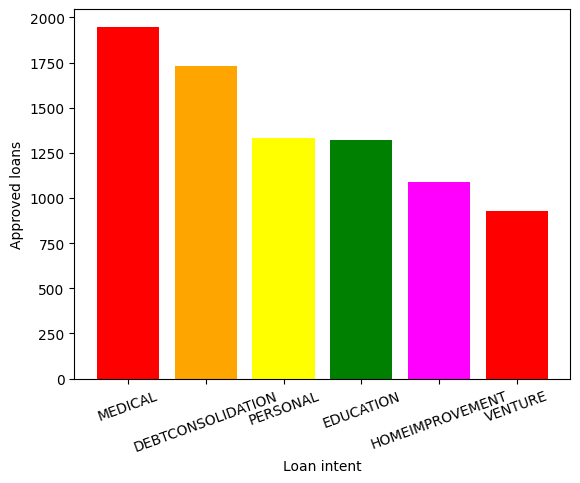

In [48]:
fig, ax = plt.subplots()
ax.bar(loan_intent.index.to_list(), loan_intent.values, color=['red', 'orange', 'yellow', 'green', 'magenta'])
plt.ylabel("Approved loans")
plt.xlabel("Loan intents")
plt.xticks(rotation=20)
plt.show()

The most approved loan is to cover **medical expenses**.

In [55]:
df_train['loan_intent'].value_counts()

loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

In [54]:
df_train[df_train['loan_status'] == 0]['loan_intent'].value_counts()

loan_intent
EDUCATION            10949
VENTURE               9082
MEDICAL               8985
PERSONAL              8686
DEBTCONSOLIDATION     7404
HOMEIMPROVEMENT       5189
Name: count, dtype: int64